<a href="https://colab.research.google.com/github/Kendi7/Deep-ML-Learning/blob/main/Copy_of_NLPwithSpaCy_AmazonReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from getpass import getpass

# Securely enter your Kaggle username and key
KAGGLE_USERNAME = input("Enter your Kaggle username: ")
KAGGLE_KEY = getpass("Enter your Kaggle API key (hidden): ")

# Set environment variables
os.environ['KAGGLE_USERNAME'] = KAGGLE_USERNAME
os.environ['KAGGLE_KEY'] = KAGGLE_KEY

# Install kaggle and download dataset
!pip install -q kaggle
!kaggle datasets download -d bittlingmayer/amazonreviews
!unzip -q amazonreviews.zip


Enter your Kaggle username: kennedyotieno1
Enter your Kaggle API key (hidden): ··········
Dataset URL: https://www.kaggle.com/datasets/bittlingmayer/amazonreviews
License(s): unknown
 97% 479M/493M [00:01<00:00, 335MB/s]
100% 493M/493M [00:01<00:00, 407MB/s]


In [ ]:
import bz2
import pandas as pd
import spacy

def load_fasttext_bz2(filepath, max_lines=5000):
    data = []
    with bz2.open(filepath, 'rt', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= max_lines:
                break
            parts = line.strip().split(' ', 1)
            if len(parts) == 2:
                label = int(parts[0].replace('__label__', ''))
                text = parts[1]
                data.append((label, text))
    return pd.DataFrame(data, columns=["star_rating", "review_body"])

# Load train sample
train_df = load_fasttext_bz2("/content/train.ft.txt.bz2")

# Load test sample
test_df = load_fasttext_bz2("/content/test.ft.txt.bz2")


In [ ]:
train_df.head()


,star_rating,review_body
0,2,Stuning even for the non-gamer: This sound tra...
1,2,The best soundtrack ever to anything.: I'm rea...
2,2,Amazing!: This soundtrack is my favorite music...
3,2,Excellent Soundtrack: I truly like this soundt...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
# Load spaCy English model

nlp = spacy.load("en_core_web_sm")

# Extract named entities related to product/brands/organizations
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ['PRODUCT', 'ORG', 'GPE']]

train_df["named_entities"] = train_df["review_body"].apply(extract_entities)

# Rule-based sentiment analysis using keywords
positive_keywords = ["good", "great", "excellent", "love", "awesome", "perfect", "amazing", "nice"]
negative_keywords = ["bad", "terrible", "awful", "hate", "poor", "worst", "disappointed", "boring"]

def rule_based_sentiment(text):
    text = text.lower()
    pos_hits = sum(word in text for word in positive_keywords)
    neg_hits = sum(word in text for word in negative_keywords)
    if pos_hits > neg_hits:
        return "Positive"
    elif neg_hits > pos_hits:
        return "Negative"
    else:
        return "Neutral"

train_df["sentiment"] = train_df["review_body"].apply(rule_based_sentiment)

# Show final result
train_df[["review_body", "named_entities", "sentiment"]].head(10)

,review_body,named_entities,sentiment
0,Stuning even for the non-gamer: This sound tra...,"[(Chrono Cross, ORG)]",Negative
1,The best soundtrack ever to anything.: I'm rea...,[],Neutral
2,Amazing!: This soundtrack is my favorite music...,"[(Time, ORG), (Scar~, ORG)]",Positive
3,Excellent Soundtrack: I truly like this soundt...,"[(Between Life and Death, Forest Of Illusion, ...",Positive
4,"Remember, Pull Your Jaw Off The Floor After He...","[(Chrono Cross, ORG), (Time, ORG)]",Positive
5,an absolute masterpiece: I am quite sure any o...,"[(Time, ORG)]",Positive
6,"Buyer beware: This is a self-published book, a...","[(Amazon, ORG)]",Negative
7,Glorious story: I loved Whisper of the wicked ...,"[(normaly, GPE)]",Positive
8,A FIVE STAR BOOK: I just finished reading Whis...,"[(Whisper of the Wicked, ORG), (Julia, ORG)]",Positive
9,Whispers of the Wicked Saints: This was a easy...,[],Neutral


 Save the output as a CSV

In [ ]:
# ✅ Save selected columns to CSV (works in both Jupyter and Colab)
train_df[["review_body", "named_entities", "sentiment"]].to_csv("amazon_reviews_ner_sentiment.csv", index=False)

print("File saved successfully as 'amazon_reviews_ner_sentiment.csv'")

# ✅ OPTIONAL: Preview saved CSV
pd.read_csv("amazon_reviews_ner_sentiment.csv").head()

# ----------------------------------------------------------
# ⬇️ For Google Colab users ONLY — download file to your local machine
# ----------------------------------------------------------
# from google.colab import files
# files.download("amazon_reviews_ner_sentiment.csv")

# ----------------------------------------------------------
# 💻 For Jupyter Notebook users — file is saved in your working directory
# To confirm where it was saved:
# import os
# print("Saved to:", os.getcwd())
# ----------------------------------------------------------


File saved successfully as 'amazon_reviews_ner_sentiment.csv'


,review_body,named_entities,sentiment
0,Stuning even for the non-gamer: This sound tra...,"[('Chrono Cross', 'ORG')]",Negative
1,The best soundtrack ever to anything.: I'm rea...,[],Neutral
2,Amazing!: This soundtrack is my favorite music...,"[('Time', 'ORG'), ('Scar~', 'ORG')]",Positive
3,Excellent Soundtrack: I truly like this soundt...,"[('Between Life and Death, Forest Of Illusion,...",Positive
4,"Remember, Pull Your Jaw Off The Floor After He...","[('Chrono Cross', 'ORG'), ('Time', 'ORG')]",Positive


# ✅  Visualize Sentiment Distribution


<ipython-input-8-423501207>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x="sentiment", palette="Set2")


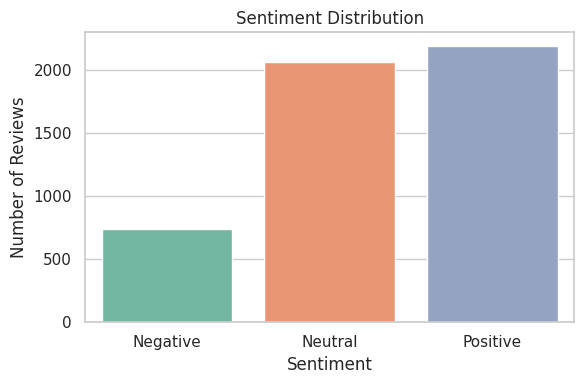

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))

# Plot sentiment counts
sns.countplot(data=train_df, x="sentiment", palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


# ✅ 3. 🔍 Improve Sentiment with TextBlob or **VADER**



1.   ✅ Option A: Using TextBlob




In [ ]:
!pip install -q textblob
from textblob import TextBlob

# TextBlob sentiment scoring
def textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

train_df["textblob_sentiment"] = train_df["review_body"].apply(textblob_sentiment)

# Compare old vs new
train_df[["review_body", "sentiment", "textblob_sentiment"]].head(10)


,review_body,sentiment,textblob_sentiment
0,Stuning even for the non-gamer: This sound tra...,Negative,Neutral
1,The best soundtrack ever to anything.: I'm rea...,Neutral,Positive
2,Amazing!: This soundtrack is my favorite music...,Positive,Positive
3,Excellent Soundtrack: I truly like this soundt...,Positive,Positive
4,"Remember, Pull Your Jaw Off The Floor After He...",Positive,Positive
5,an absolute masterpiece: I am quite sure any o...,Positive,Positive
6,"Buyer beware: This is a self-published book, a...",Negative,Neutral
7,Glorious story: I loved Whisper of the wicked ...,Positive,Positive
8,A FIVE STAR BOOK: I just finished reading Whis...,Positive,Neutral
9,Whispers of the Wicked Saints: This was a easy...,Neutral,Positive





2.   ✅ Option B: Using VADER (more accurate for short reviews)





In [ ]:
!pip install -q vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

train_df["vader_sentiment"] = train_df["review_body"].apply(vader_sentiment)

# Compare results
train_df[["review_body", "sentiment", "textblob_sentiment", "vader_sentiment"]].head(10)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


,review_body,sentiment,textblob_sentiment,vader_sentiment
0,Stuning even for the non-gamer: This sound tra...,Negative,Neutral,Positive
1,The best soundtrack ever to anything.: I'm rea...,Neutral,Positive,Positive
2,Amazing!: This soundtrack is my favorite music...,Positive,Positive,Positive
3,Excellent Soundtrack: I truly like this soundt...,Positive,Positive,Positive
4,"Remember, Pull Your Jaw Off The Floor After He...",Positive,Positive,Positive
5,an absolute masterpiece: I am quite sure any o...,Positive,Positive,Positive
6,"Buyer beware: This is a self-published book, a...",Negative,Neutral,Negative
7,Glorious story: I loved Whisper of the wicked ...,Positive,Positive,Positive
8,A FIVE STAR BOOK: I just finished reading Whis...,Positive,Neutral,Positive
9,Whispers of the Wicked Saints: This was a easy...,Neutral,Positive,Positive


# ✅ 1. Ethical Considerations in ML Models (Amazon Reviews **bold text**

🔍 A. Bias in Amazon Reviews Sentiment/NER Model

| **Issue**                         | **Example / Explanation**                                                                                        |
| --------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **Label bias**                    | Labels like `__label__1` and `__label__2` may not reflect true sentiment nuance (e.g., sarcasm, mixed feelings). |
| **Language bias**                 | Rule-based systems may misclassify reviews due to informal language, slang, or dialects.                         |
| **Domain bias**                   | Model trained on book reviews might not generalize to electronics, fashion, etc.                                 |
| **NER limitations**               | spaCy might miss informal mentions of brand names (e.g., “iphone” vs “iPhone”).                                  |
| **Underrepresented demographics** | Text sentiment might differ across cultures, dialects, or writing styles — and bias the model output.            |


# **🛠 Mitigation Strategies with Tools**

| **Tool / Technique**                                                                                      | **How It Helps**                                                                                             |
| --------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------ |
| **spaCy’s rule-based NER patterns**                                                                       | Allows customization to better recognize domain-specific product or brand terms (e.g., `"iphone"`, `"PS5"`). |
| **Text normalization & cleaning**                                                                         | Helps reduce slang/dialect variation impact.                                                                 |
| **Label smoothing**                                                                                       | Helps prevent overfitting to noisy labels in review sentiment data.                                          |
| **[TensorFlow Fairness Indicators](https://www.tensorflow.org/responsible_ai/fairness_indicators/guide)** | Provides tools to evaluate model fairness across groups (e.g., age, gender, region, language style).         |
| **Bias-aware evaluation**                                                                                 | Segment model accuracy by metadata (e.g., verified reviews vs non-verified) to detect performance gaps.      |


# 🔎 What Can Be Done Practically

1. Fine-tune NER with custom spaCy patterns to include domain-specific terms

2. Evaluate sentiment bias by grouping reviews (e.g., low vs high word count, or region-specific language)

3. Use TextBlob/VADER alongside your model to triangulate sentiment predictions

